# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*)

Dataset ini berisi informasi pelanggan bank dengan 10,000 baris data dan 14 kolom yang mencakup:
- Informasi demografis (CreditScore, Geography, Gender, Age)
- Informasi rekening (Tenure, Balance, NumOfProducts)
- Status pelanggan (HasCrCard, IsActiveMember)
- Informasi finansial (EstimatedSalary)

2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# 2. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# 3. Memuat Dataset
df = pd.read_csv('Data.csv')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [5]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


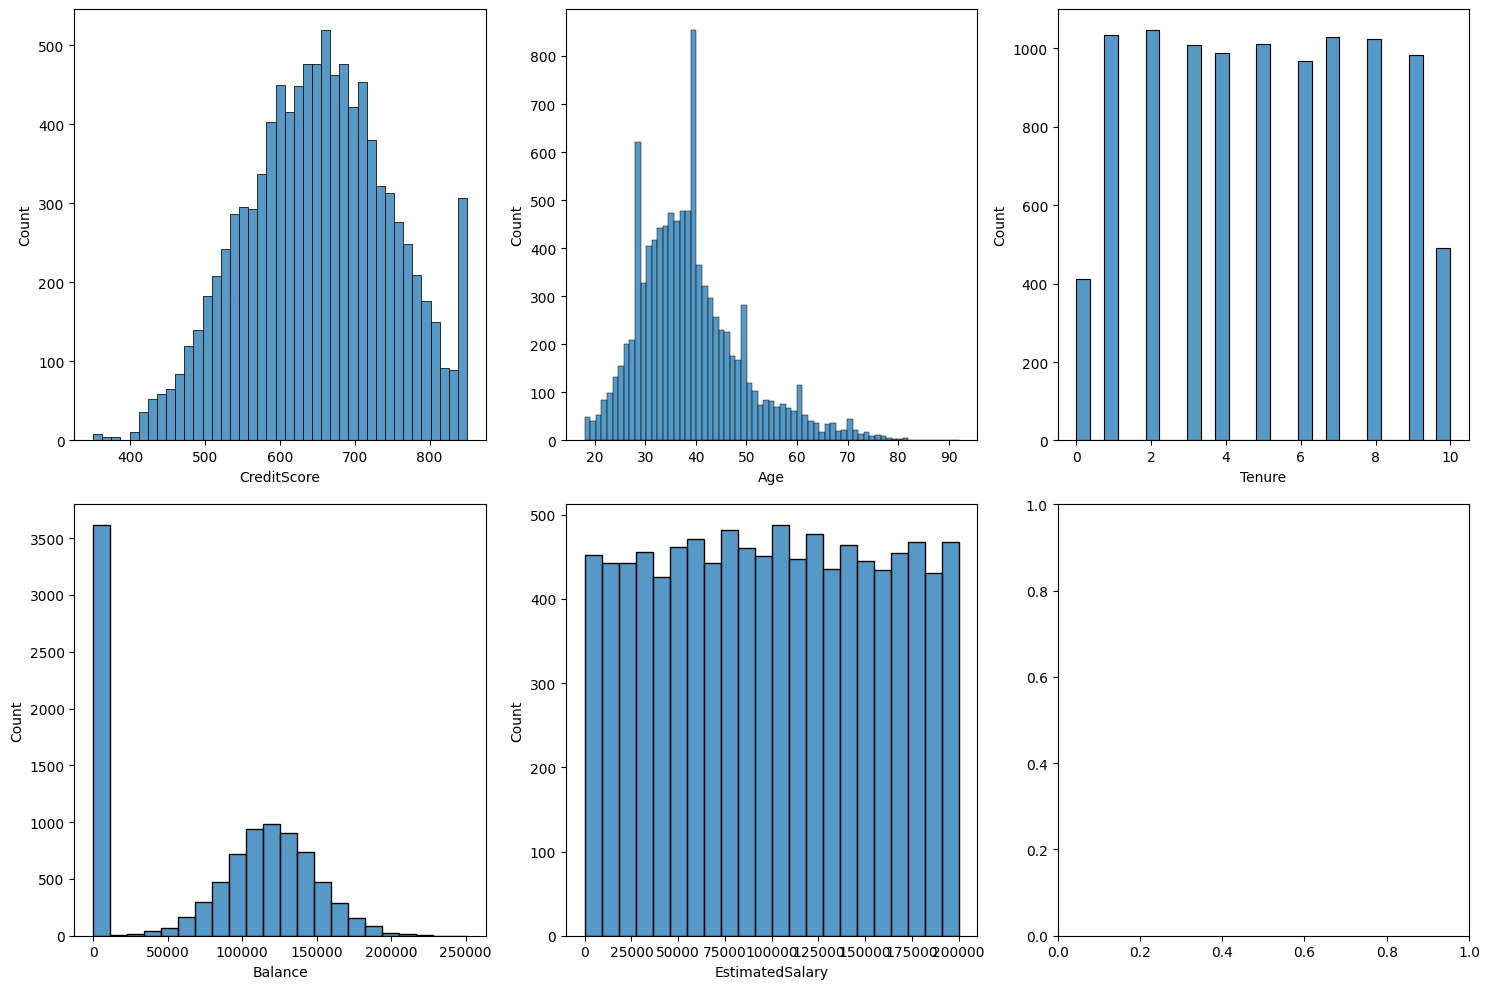

In [7]:
# Distribution plots for numerical variables
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[idx])
plt.tight_layout()
plt.show()

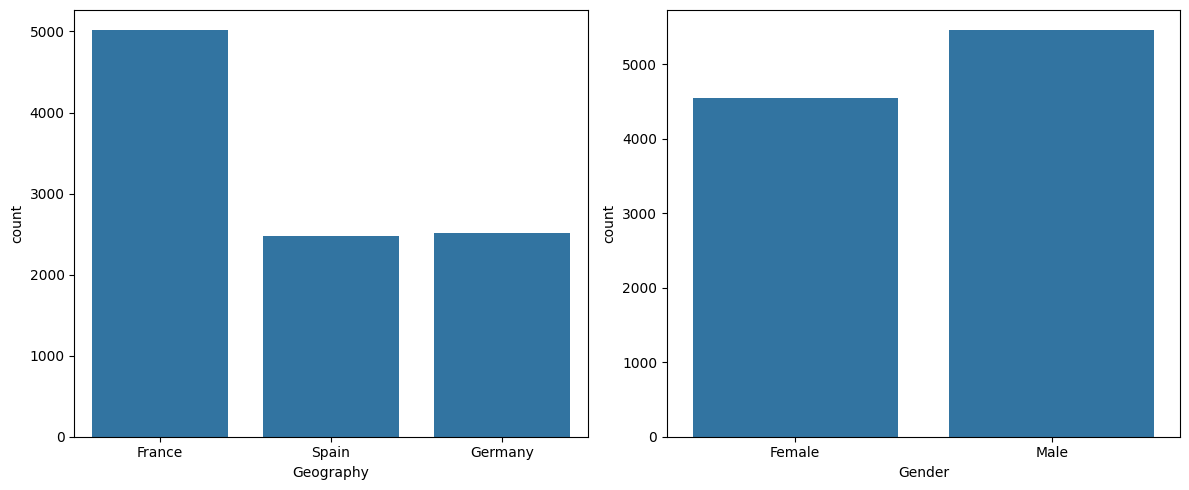

In [8]:
# Distribution of categorical variables
categorical_cols = ['Geography', 'Gender']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx])
plt.tight_layout()
plt.show()

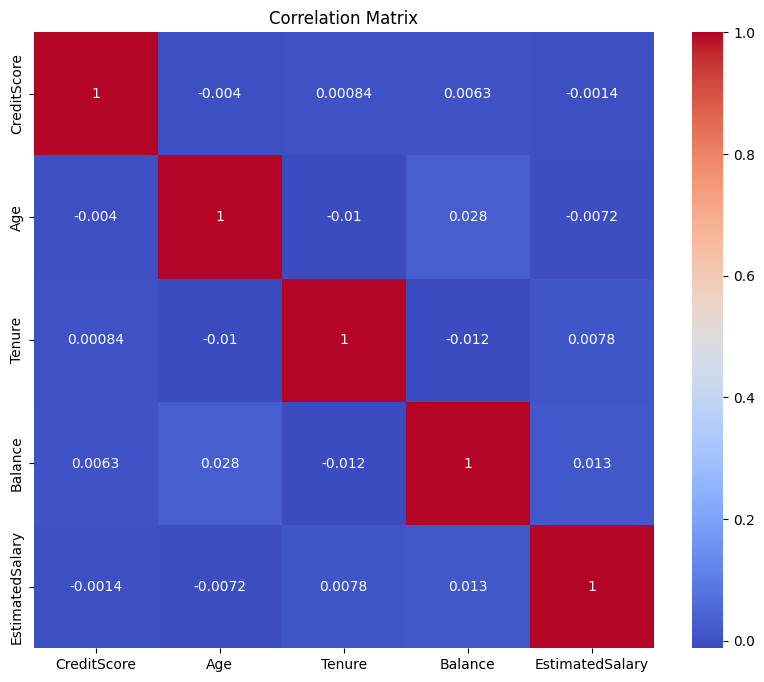

In [9]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
# Remove unnecessary columns
df_cleaned = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)

In [11]:
# Label encoding for categorical variables
le = LabelEncoder()
df_cleaned['Geography'] = le.fit_transform(df_cleaned['Geography'])
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])

In [12]:
# Standardization
scaler = StandardScaler()
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [13]:
# Determine optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_cleaned, kmeans.labels_))

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Text(0.5, 1.0, 'Elbow Method')

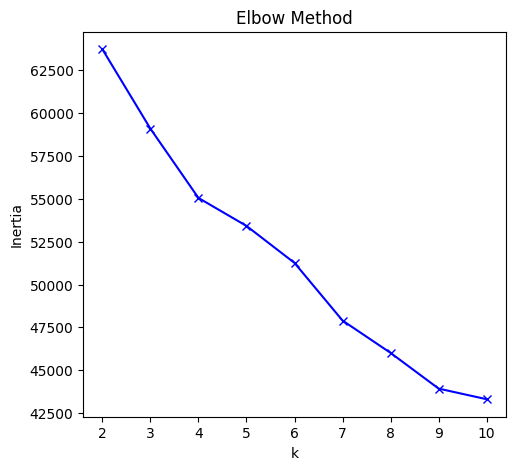

In [14]:
# Plot elbow curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')

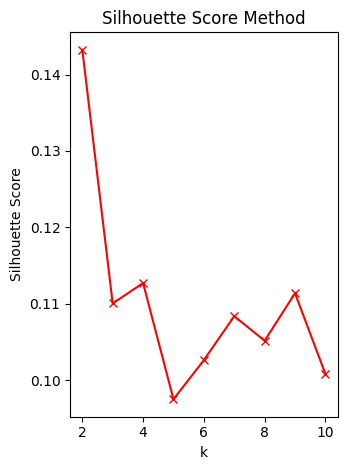

In [15]:
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.tight_layout()
plt.show()

In [16]:
# Train final model with optimal number of clusters (k=3 based on elbow method)
final_kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = final_kmeans.fit_predict(df_cleaned)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [17]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [18]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned.drop('Cluster', axis=1))

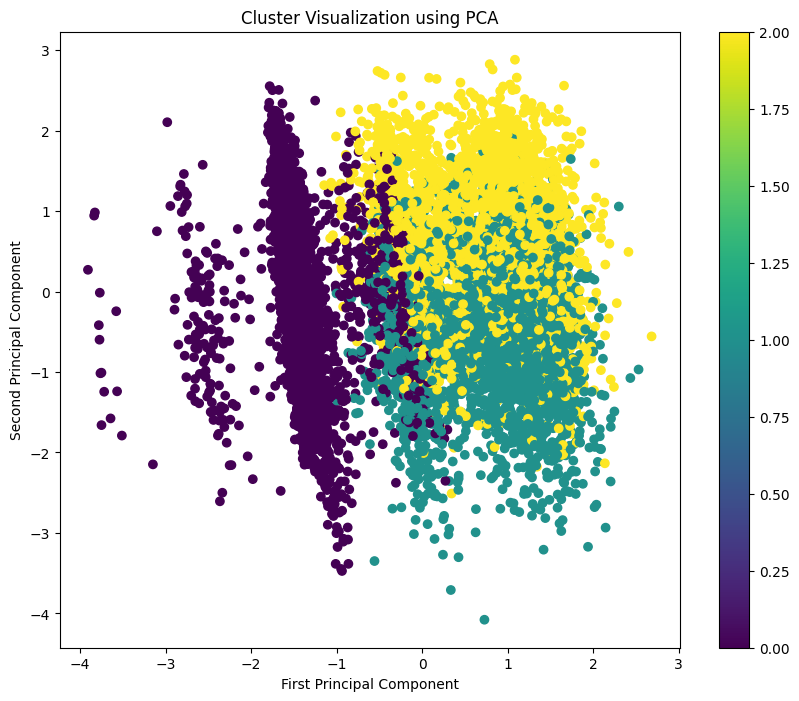

In [19]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [20]:
# Analyze cluster characteristics
cluster_analysis = df.groupby(df_cleaned['Cluster']).agg({
    'CreditScore': 'mean',
    'Age': 'mean',
    'Tenure': 'mean',
    'Balance': 'mean',
    'NumOfProducts': 'mean',
    'EstimatedSalary': 'mean'
}).round(2)

In [21]:
print("\nCluster Characteristics:")
print(cluster_analysis)



Cluster Characteristics:
         CreditScore    Age  Tenure    Balance  NumOfProducts  EstimatedSalary
Cluster                                                                       
0             648.72  38.13    5.14   10141.61           1.97         99392.39
1             653.13  40.02    4.92  112951.56           1.27         48857.99
2             649.91  38.68    4.97  113372.41           1.30        152739.26


### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [22]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [23]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1: 
- Rata-rata Credit Score: 648.72

- Rata-rata Usia: 38.13 tahun

- Rata-rata Tenure: 5.14 tahun

- Rata-rata Balance: 10,141.61

- Rata-rata Jumlah Produk: 1.97

- Rata-rata Pendapatan: 99,392.39  
2. Cluster 2:
- Rata-rata Credit Score: 653.13

- Rata-rata Usia: 40.02 tahun

- Rata-rata Tenure: 4.92 tahun

- Rata-rata Balance: 112,951.56

- Rata-rata Jumlah Produk: 1.27

- Rata-rata Pendapatan: 48,857.99
3. Cluster 3:
- Rata-rata Credit Score: 649.91

- Rata-rata Usia: 38.68 tahun

- Rata-rata Tenure: 4.97 tahun

- Rata-rata Balance: 113,372.41

- Rata-rata Jumlah Produk: 1.30

- Rata-rata Pendapatan: 152,739.26

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- Rata-rata Credit Score: 648.72

- Rata-rata Usia: 38.13 tahun

- Rata-rata Tenure: 5.14 tahun

- Rata-rata Balance: 10,141.61

- Rata-rata Jumlah Produk: 1.97

- Rata-rata Pendapatan: 99,392.39

- Analisis: Cluster ini terdiri dari pelanggan dengan jumlah produk yang hampir 2 tetapi memiliki saldo yang lebih rendah dibandingkan cluster lain. Pendapatan mereka cukup tinggi, namun mereka cenderung memiliki saldo lebih kecil. Ini bisa menunjukkan kelompok pelanggan yang aktif menggunakan produk tetapi tidak menyimpan banyak dana dalam rekening mereka.

## Cluster 2:
- Rata-rata Credit Score: 653.13

- Rata-rata Usia: 40.02 tahun

- Rata-rata Tenure: 4.92 tahun

- Rata-rata Balance: 112,951.56

- Rata-rata Jumlah Produk: 1.27

- Rata-rata Pendapatan: 48,857.99

- Analisis: Cluster ini memiliki saldo tertinggi di antara semua cluster, meskipun jumlah produk yang dimiliki lebih sedikit. Pendapatan rata-rata mereka lebih rendah dibanding cluster lainnya, yang mungkin mengindikasikan bahwa mereka cenderung menyimpan lebih banyak uang daripada membelanjakannya dalam produk tambahan. Ini bisa menunjukkan kelompok pelanggan konservatif atau mereka yang lebih fokus pada tabungan dan investasi.

## Cluster 3:
- Rata-rata Credit Score: 649.91

- Rata-rata Usia: 38.68 tahun

- Rata-rata Tenure: 4.97 tahun

- Rata-rata Balance: 113,372.41

- Rata-rata Jumlah Produk: 1.30

- Rata-rata Pendapatan: 152,739.26

- Analisis: Cluster ini mencakup pelanggan dengan saldo tinggi, hampir setara dengan Cluster 1, tetapi memiliki pendapatan tertinggi dibandingkan semua cluster lainnya. Mereka memiliki jumlah produk yang sedikit lebih tinggi dari Cluster 1, yang menunjukkan bahwa mereka mungkin memiliki daya beli yang besar namun cenderung menyimpan saldo yang cukup besar dalam rekening mereka. Ini bisa menunjukkan kelompok pelanggan premium yang memiliki stabilitas finansial tinggi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [24]:
# 7. Export results
# Add cluster labels to original dataframe
df['Cluster'] = df_cleaned['Cluster']
df.to_csv('clustering_results.csv', index=False)